# Reducción de Dimensionalidad

La reducción de dimensionalidad es un conjunto de técnicas para disminuir la cantidad de variables o características en un conjunto de datos, conservando la mayor cantidad posible de información relevante. Se utiliza para simplificar el análisis y la visualización de datos de alta dimensionalidad, mejorar la eficiencia computacional y reducir el riesgo de sobreajuste en modelos de aprendizaje automático.


# Analisis de componentes principales (PCA)

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Es un método matemático que se utiliza para reducir el número de variables de forma que pasemos a tener el mínimo número de nuevas variables y que representen a todas las antiguas variables de la forma más representativa posible.

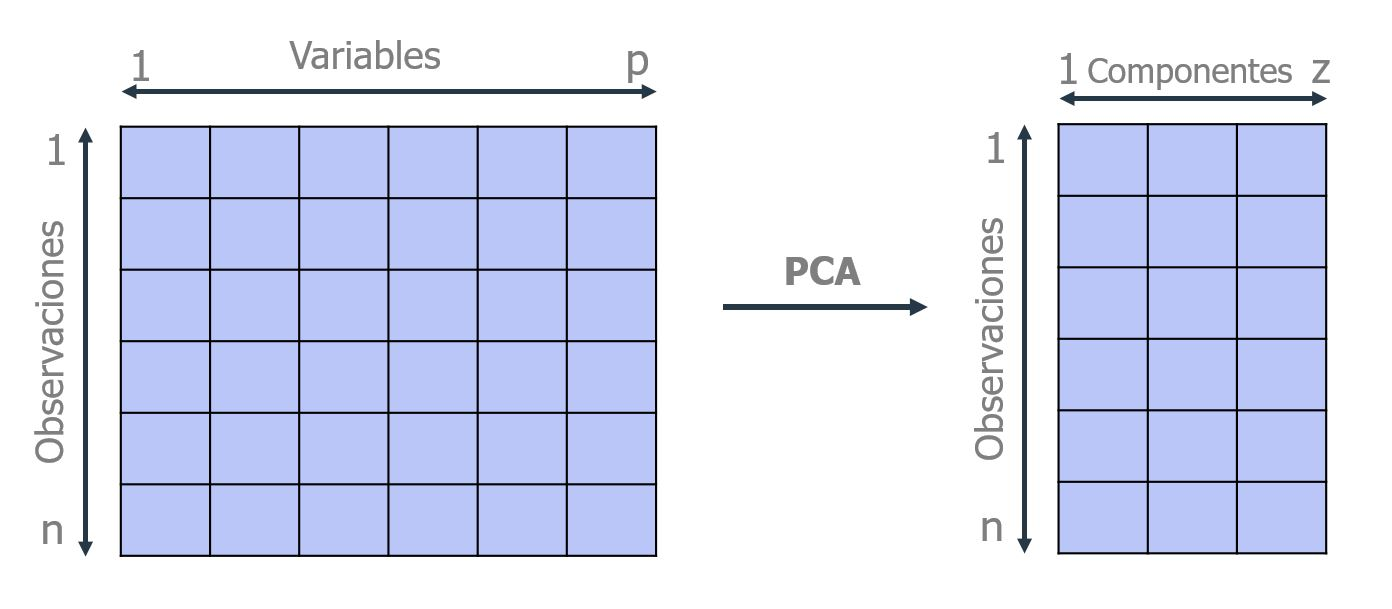

El método de PCA permite  "condensar" la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

La librería scikitlearn contiene la clase sklearn.decomposition.PCA que implementa la mayoría de las funcionalidades necesarias para crear y utilizar modelos PCA

# Interpretación geométrica de las componentes principales

Una forma intuitiva de entender el proceso de PCA es interpretar las componentes principales desde un punto de vista geométrico. Supóngase un conjunto de observaciones para las que se dispone de dos variables ( X1
 ,  X2
 ). El vector que define la primera componente principal ( Z1
 ) sigue la dirección en la que las observaciones tienen más varianza (línea roja). La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component score,  zi1
 ).

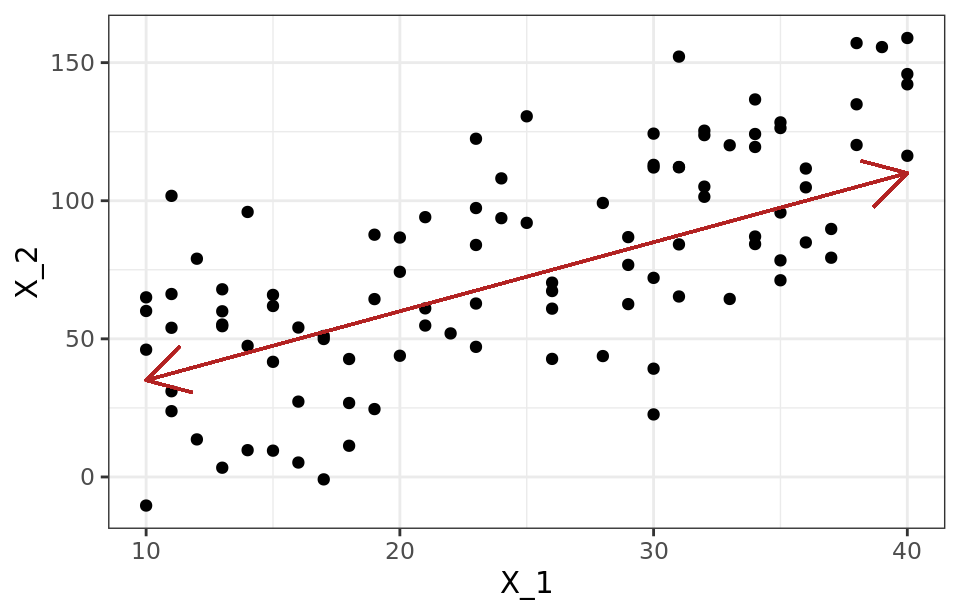

La segunda componente ( Z2
 ) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

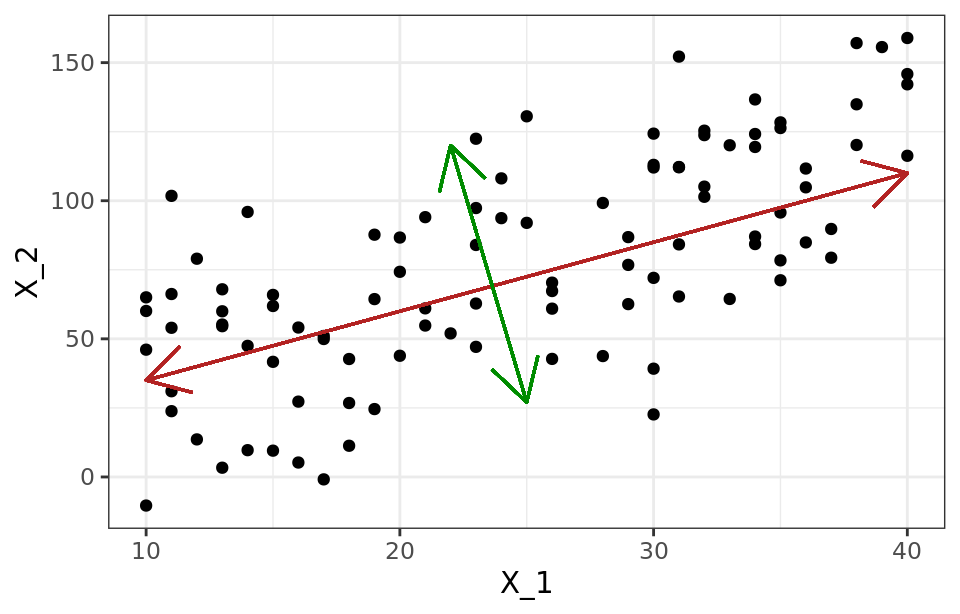

# Escalado de las variables

El proceso de PCA identifica las direcciones con mayor varianza. Como la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar de uno, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.

# Influencia de outliers

Al trabajar con varianzas, el método PCA es muy sensible a outliers, por lo que es recomendable estudiar si los hay. La detección de valores atípicos con respecto a una determinada dimensión es algo relativamente sencillo de hacer mediante comprobaciones gráficas. Sin embargo, cuando se trata con múltiples dimensiones el proceso se complica. Por ejemplo, considérese un hombre que mide 2 metros y pesa 50 kg. Ninguno de los dos valores es atípico de forma individual, pero en conjunto se trataría de un caso muy excepcional.

# Ejemplo PCA

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
'''
Statsmodels es una biblioteca de análisis y modelado de datos estadísticos.
Ofrece una serie de funcionalidades que no se encuentran en bibliotecas como sklearn.
statsmodels completa en gran medida la regresión lineal clásica proponiendo
nuevos estimadores de mínimos cuadrados.
Normalmente, se utilizan los mínimos cuadrados ordinarios (OLS) para estimar la regresión lineal.

En conclusion es una libreria que nos ayudará a ver graficamente modelos de series temporales 
de regresion lineal
'''

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# DATA

El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP)

In [9]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [27]:
len(datos)

50

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
datos.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

In [11]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

In [12]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

# Modelo PCA

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline.
* Los pipelines de datos toman los datos sin procesar, los enrutan hacia un emplazamiento de almacenamiento adecuado y los transforman en información práctica

* Los pipelines ayudan a evitar la fuga de estadísticas de los datos de prueba en el modelo entrenado en la validación cruzada, asegurando que se utilizan las mismas muestras para entrenar los transformadores y los predictores.

In [13]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
#Esta línea extrae el modelo PCA entrenado del pipeline. 
#El atributo named_steps del pipeline es un diccionario que asigna los
#nombres de los pasos a los objetos correspondientes. 
#En este caso, recupera el modelo PCA que fue entrenado en el paso anterior.

Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  ϕ
  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza ). Las filas se corresponden con las variables de entrada.

In [14]:
# Se transforma el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


# Análisis

Los resultados del análisis de PCA son gráficos de “scores” y de “loadings”. A través del gráfico “loadings” se puede determinar la correlación entre variables. Cada variable tiene un valor de “loading” en cada PC, el cual indica en qué extensión esa variable contribuye a ese PC


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

PC1=0.535899 Murder+0.583184 Assault+0.278191 UrbanPop+0.543432 Rape
 
Los pesos asignados en la primera componente a las variables Assault, Murder y Rape son aproximadamente iguales entre ellos y superiores al asignado a UrbanPoP. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP es la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

La influencia de las variables en cada componente puede analizarse visualmente con un gráfico de tipo heatmap.

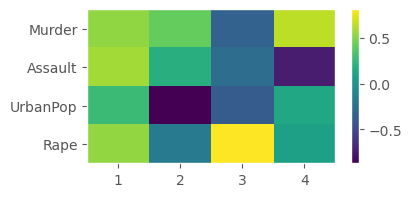

In [15]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


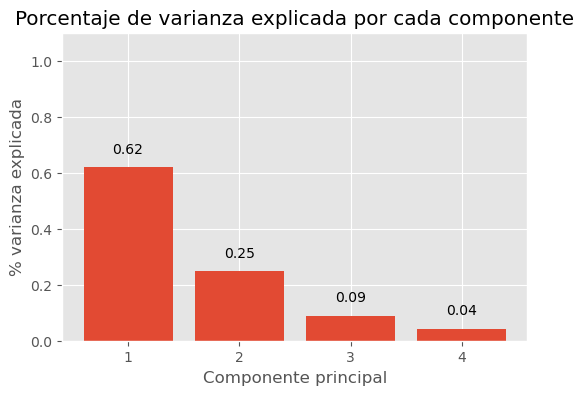

In [17]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza explicada');

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


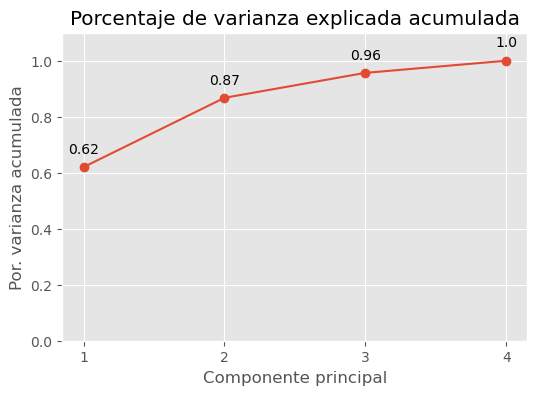

In [19]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');


para pc2,
Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

# Transformacion

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [28]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [22]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


# Reconstruccion

Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [29]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(datos.head())


print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(recostruccion.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6
